앞서 로지스틱 회귀를 통해 2개의 선택지 중에서 1개를 고르는 이진 분류(Binary Classification)를 풀어봤습니다. 이번 챕터에서는 소프트맥스 회귀를 통해 3개 이상의 선택지 중에서 1개를 고르는 다중 클래스 분류(Multi-Class Classification)를 실습해봅시다.

# 1. 다중 클래스 분류(Multi-class Classification)

---

이진 분류가 두 개의 답 중 하나를 고르는 문제였다면, 세 개 이상의 답 중 하나를 고르는 문제를 다중 클래스 분류(Multi-class Classification)라고 합니다. 아래의 문제는 꽃받침 길이, 꽃받침 넓이, 꽃잎 길이, 꽃잎 넓이라는 4개의 특성(feature)로부터 setosa, versicolor, virginica라는 3개의 붓꽃 품종 중 어떤 품종인지를 예측하는 문제로 전형적인 다중 클래스 분류 문제입니다.

<table>
<thead>
<tr>
<th>SepalLengthCm($x_1$)</th>
<th>SepalWidthCm($x_2$)</th>
<th>PetalLengthCm($x_3$)</th>
<th>PetalWidthCm($x_4$)</th>
<th>Species(y)</th>
</tr>
</thead>
<tbody>
<tr>
<td>5.1</td>
<td>3.5</td>
<td>1.4</td>
<td>0.2</td>
<td>setosa</td>
</tr>
<tr>
<td>4.9</td>
<td>3.0</td>
<td>1.4</td>
<td>0.2</td>
<td>setosa</td>
</tr>
<tr>
<td>5.8</td>
<td>2.6</td>
<td>4.0</td>
<td>1.2</td>
<td>versicolor</td>
</tr>
<tr>
<td>6.7</td>
<td>3.0</td>
<td>5.2</td>
<td>2.3</td>
<td>virginica</td>
</tr>
<tr>
<td>5.6</td>
<td>2.8</td>
<td>4.9</td>
<td>2.0</td>
<td>virginica</td>
</tr>
</tbody>
</table>

위 **붓꽃 품종 분류하기 문제**를 어떻게 풀지 고민하기 위해 앞서 배운 로지스틱 회귀의 이진 분류를 복습해보겠습니다.

이번 챕터의 설명에서 입력은 $X$, 가중치는 $W$, 편향은 $B$, 출력은 $\hat{Y}$로 각 변수는 벡터 또는 행렬로 가정합니다.

+ $\hat{Y}$은 예측값이라는 의미를 가지고 있으므로 가설식에서 $H(X)$ 대신 사용되기도 합니다.

## 1) 로지스틱 회귀

로지스틱 회귀에서 시그모이드 함수는 예측값을 0과 1 사이의 값으로 만듭니다. 예를 들어 스팸 메일 분류기를 로지스틱 회귀로 구현하였을 때, 출력이 0.75이라면 이는 이메일이 스팸일 확률이 75%라는 의미가 됩니다. 반대로, 스팸 메일이 아닐 확률은 25%가 됩니다. 이 두 확률의 총 합은 1입니다.

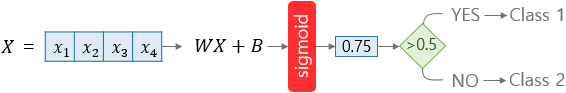

**가설 :** $H(X) = sigmoid(WX + B)$

## 2) 소프트맥스 회귀


소프트맥스 회귀는 확률의 총 합이 1이 되는 이 아이디어를 다중 클래스 분류 문제에 적용합니다. 소프트맥스 회귀는 각 클래스. 즉, 각 선택지마다 소수 확률을 할당합니다. 이때 총 확률의 합은 1이 되어야 합니다. 이렇게 되면 각 선택지가 정답일 확률로 표현됩니다.

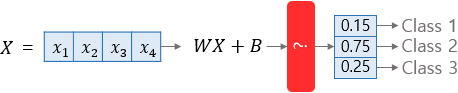

결국 소프트맥스 회귀는 선택지의 개수만큼의 차원을 가지는 벡터를 만들고, 해당 벡터가 벡터의 모든 원소의 합이 1이 되도록 원소들의 값을 변환시키는 어떤 함수를 지나게 만들어야 합니다. 위의 그림은 붓꽃 품종 분류하기 문제 등과 같이 선택지의 개수가 3개일때, 3차원 벡터가 어떤 함수 ?를 지나 원소의 총 합이 1이 되도록 원소들의 값이 변환되는 모습을 보여줍니다. 뒤에서 배우겠지만, 이 함수를 소프트맥스(softmax) 함수라고 합니다.

**가설 :** $H(X) = softmax(WX + B)$

# 2. 소프트맥스 함수(Softmax function)

---

소프트맥스 함수는 분류해야하는 정답지(클래스)의 총 개수를 k라고 할 때, k차원의 벡터를 입력받아 각 클래스에 대한 확률을 추정합니다. 우선 수식에 대해 설명하고, 그 후에는 그림으로 이해해보겠습니다.

## 1) 소프트맥스 함수의 이해

k차원의 벡터에서 i번째 원소를 $z_i$, i번째 클래스가 정답일 확률을 $p_i$로 나타낸다고 하였을 때 소프트맥스 함수는 $p_i$를 다음과 같이 정의합니다.

$$
p_{i}=\frac{e^{z_{i}}}{\sum_{j=1}^{k} e^{z_{j}}}\ \ for\ i=1, 2, ... k
$$

위에서 풀어야하는 문제에 소프트맥스 함수를 차근차근 적용해봅시다. 위에서 풀어야하는 문제의 경우 k=3이므로 3차원 벡터 $z=[z_{1}\ z_{2}\ z_{3}]$의 입력을 받으면 소프트맥스 함수는 아래와 같은 출력을 리턴합니다.

$$
softmax(z)=[\frac{e^{z_{1}}}{\sum_{j=1}^{3} e^{z_{j}}}\ \frac{e^{z_{2}}}{\sum_{j=1}^{3} e^{z_{j}}}\ \frac{e^{z_{3}}}{\sum_{j=1}^{3} e^{z_{j}}}] = [p_{1}, p_{2}, p_{3}] = \hat{y} = \text{예측값}
$$

$p_{1}, p_{2}, p_{3}$ 각각은 1번 클래스가 정답일 확률, 2번 클래스가 정답일 확률, 3번 클래스가 정답일 확률을 나타내며 각각 0과 1사이의 값으로 총 합은 1이 됩니다. 여기서 분류하고자하는 3개의 클래스는 virginica, setosa, versicolor이므로 이는 결국 주어진 입력이 virginica일 확률, setosa일 확률, versicolor일 확률을 나타내는 값을 의미합니다. 여기서는 i가 1일 때는 virginica일 확률을 나타내고, 2일 때는 setosa일 확률, 3일때는 versicolor일 확률이라고 지정하였다고 합시다. 이 지정 순서는 문제를 풀고자 하는 사람의 무작위 선택입니다. 이에따라 식을 문제에 맞게 다시 쓰면 아래와 같습니다.

$$
softmax(z)=[\frac{e^{z_{1}}}{\sum_{j=1}^{3} e^{z_{j}}}\ \frac{e^{z_{2}}}{\sum_{j=1}^{3} e^{z_{j}}}\ \frac{e^{z_{3}}}{\sum_{j=1}^{3} e^{z_{j}}}] = [p_{1}, p_{2}, p_{3}] = [p_{virginica}, p_{setosa}, p_{versicolor}]
$$

다소 복잡해보이지만 어려운 개념이 아닙니다. 분류하고자 하는 클래스가 k개일 때, k차원의 벡터를 입력받아서 모든 벡터 원소의 값을 0과 1사이의 값으로 값을 변경하여 다시 k차원의 벡터를 리턴한다는 내용을 식으로 기재하였을 뿐입니다. 방금 배운 개념을 그림을 통해 다시 설명하면서 더 깊이 들어가보겠습니다.

## 2) 그림을 통한 이해

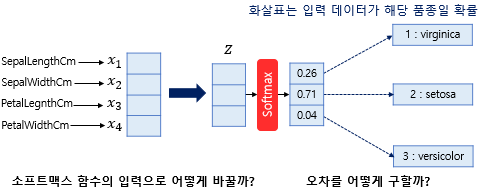

위의 그림에 점차 살을 붙여봅시다. 여기서는 샘플 데이터를 1개씩 입력으로 받아 처리한다고 가정해봅시다. 즉, 배치 크기가 1입니다.

위의 그림에는 두 가지 질문이 있습니다. 첫번째 질문은 소프트맥스 함수의 입력에 대한 질문입니다. 하나의 샘플 데이터는 4개의 독립 변수 $x$를 가지는데 이는 모델이 4차원 벡터를 입력으로 받음을 의미합니다. 그런데 소프트맥스의 함수의 입력으로 사용되는 벡터는 벡터의 차원이 분류하고자 하는 클래스의 개수가 되어야 하므로 어떤 가중치 연산을 통해 3차원 벡터로 변환되어야 합니다. 위의 그림에서는 소프트맥스 함수의 입력으로 사용되는 3차원 벡터를 $z$로 표현하였습니다.

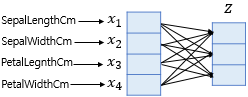

샘플 데이터 벡터를 소프트맥스 함수의 입력 벡터로 차원을 축소하는 방법은 간단합니다. 소프트맥스 함수의 입력 벡터 $z$의 차원수만큼 결과값의 나오도록 가중치 곱을 진행합니다. 위의 그림에서 화살표는 총 (4 × 3 = 12) 12개이며 전부 다른 가중치를 가지고, 학습 과정에서 점차적으로 오차를 최소화하는 가중치로 값이 변경됩니다.

두번째 질문은 오차 계산 방법에 대한 질문입니다. 소프트맥스 함수의 출력은 분류하고자하는 클래스의 개수만큼 차원을 가지는 벡터로 각 원소는 0과 1사이의 값을 가집니다. 이 각각은 특정 클래스가 정답일 확률을 나타냅니다. 여기서는 첫번째 원소인 $p_1$은 virginica가 정답일 확률, 두번째 원소인 $p_2$는 setosa가 정답일 확률, 세번째 원소인 $p_3$은 versicolor가 정답일 확률로 고려하고자 합니다. 그렇다면 이 예측값과 비교를 할 수 있는 실제값의 표현 방법이 있어야 합니다. 소프트맥스 회귀에서는 실제값을 원-핫 벡터로 표현합니다.

두번째 질문은 오차 계산 방법에 대한 질문입니다. 소프트맥스 함수의 출력은 분류하고자하는 클래스의 개수만큼 차원을 가지는 벡터로 각 원소는 0과 1사이의 값을 가집니다. 이 각각은 특정 클래스가 정답일 확률을 나타냅니다. 여기서는 첫번째 원소인 $p_1$은 virginica가 정답일 확률, 두번째 원소인 $p_2$는 setosa가 정답일 확률, 세번째 원소인 $p_3$은 versicolor가 정답일 확률로 고려하고자 합니다. 그렇다면 이 예측값과 비교를 할 수 있는 실제값의 표현 방법이 있어야 합니다. 소프트맥스 회귀에서는 실제값을 원-핫 벡터로 표현합니다.

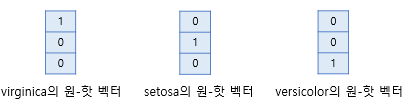

위의 그림은 소프트맥스 함수의 출력 벡터의 첫번째 원소 $p_1$가 virginica가 정답일 확률, 두번째 원소 $p_2$가 setosa가 정답일 확률, 세번째 원소 $p_3$가 versicolor가 정답일 확률을 의미한다고 하였을 때, 각 실제값의 정수 인코딩은 1, 2, 3이 되고 이에 원-핫 인코딩을 수행하여 실제값을 원-핫 벡터로 수치화한 것을 보여줍니다.

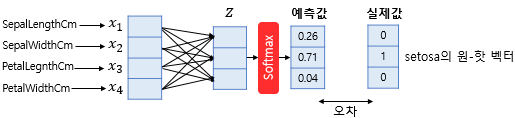

예를 들어 현재 풀고 있는 샘플 데이터의 실제값이 setosa라면 setosa의 원-핫 벡터는 [0 1 0]입니다. 이 경우, 예측값과 실제값의 오차가 0이 되는 경우는 소프트맥스 함수의 결과가 [0 1 0]이 되는 경우입니다. 이 두 벡터의 오차를 계산하기 위해서 소프트맥스 회귀는 비용 함수로 크로스 엔트로피 함수를 사용하는데, 이는 뒤에서 비용 함수를 설명하는 부분에서 다시 언급하겠습니다.

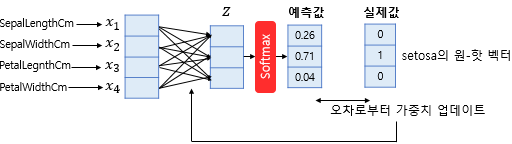

이제 앞서 배운 선형 회귀나 로지스틱 회귀와 마찬가지로 오차로부터 가중치를 업데이트 합니다.

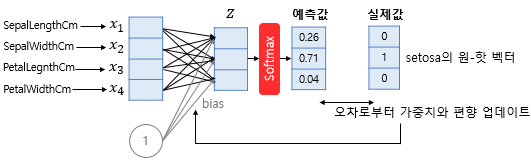

더 정확히는 선형 회귀나 로지스틱 회귀와 마찬가지로 편향 또한 업데이트의 대상이 되는 매개 변수입니다. 소프트맥스 회귀를 벡터와 행렬 연산으로 이해해봅시다. 입력을 특성(feature)의 수만큼의 차원을 가진 입력 벡터 $x$라고 하고, 가중치 행렬을 $W$, 편향을 $b$라고 하였을 때, 소프트맥스 회귀에서 예측값을 구하는 과정을 벡터와 행렬 연산으로 표현하면 아래와 같습니다.

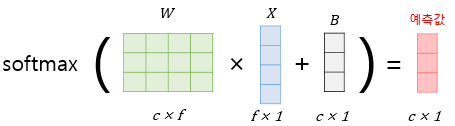

여기서 $f$는 특성의 수이며 $c$는 클래스의 개수에 해당됩니다.

# 3. 붓꽃 품종 분류하기 행렬 연산으로 이해하기

---

위의 붓꽃 품종 분류 문제의 가설식을 행렬 연산으로 표현해보겠습니다. 우선 위의 예제의 데이터는 전체 샘플의 개수가 5개, 특성이 4개이므로 5 × 4 행렬 $X$로 정의합니다.

$$
X=
\left(
    \begin{array}{c}
      5.1\ 3.5\ 1.4\ 0.2\ \\
      4.9\ 3.0\ 1.4\ 0.2\ \\
      5.8\ 2.6\ 4.0\ 1.2\ \\
      6.7\ 3.0\ 5.2\ 2.3\ \\
      5.6\ 2.8\ 4.9\ 2.0\ \\
    \end{array}
  \right)
$$

편의를 위해 각 행렬의 원소 위치를 반영한 변수로 표현하겠습니다.

$$
X=\left(
    \begin{array}{c}
      x_{11}\ x_{12}\ x_{13}\ x_{14}\ \\
      x_{21}\ x_{22}\ x_{23}\ x_{24}\ \\
      x_{31}\ x_{32}\ x_{33}\ x_{34}\ \\
      x_{41}\ x_{42}\ x_{43}\ x_{44}\ \\
      x_{51}\ x_{52}\ x_{53}\ x_{54}\ \\
    \end{array}
  \right)
$$

이번 문제는 선택지가 총 3개인 문제이므로 가설의 예측값으로 얻는 행렬 $\hat{Y}$의 열의 개수는 3개여야 합니다. 그리고 각 행은 행렬 $X$의 각 행의 예측값이므로 행의 크기는 동일해야 합니다. 결과적으로 행렬 $\hat{Y}$의 크기는 5 × 3입니다.

$$
\hat{Y}=\left(
    \begin{array}{c}
      y_{11}\ y_{12}\ y_{13}\ \\
      y_{21}\ y_{22}\ y_{23}\ \\
      y_{31}\ y_{32}\ y_{33}\ \\
      y_{41}\ y_{42}\ y_{43}\ \\
      y_{51}\ y_{52}\ y_{53}\ \\
    \end{array}
  \right)
$$

크기 5 × 3의 행렬 $\hat{Y}$는 크기 5 × 4 입력 행렬 $X$과 가중치 행렬 $W$의 곱으로 얻어지는 행렬이므로 가중치 행렬 $W$의 크기는 추정을 통해 4 × 3의 크기를 가진 행렬임을 알 수 있습니다.

$$
W=\left(
    \begin{array}{c}
      w_{11}\ w_{12}\ w_{13}\ \\
      w_{21}\ w_{22}\ w_{23}\ \\
      w_{31}\ w_{32}\ w_{33}\ \\
      w_{41}\ w_{42}\ w_{43}\ \\
    \end{array}
  \right)
$$

편향 행렬 $B$는 예측값 행렬 $\hat{Y}$와 크기가 동일해야 하므로 5 × 3의 크기를 가집니다.

$$
B=\left(
    \begin{array}{c}
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
    \end{array}
  \right)
$$

결과적으로 가설식은 다음과 같습니다.

$\hat{Y} = softmax(XW + B)$

$$
\left(
    \begin{array}{c}
      y_{11}\ y_{12}\ y_{13}\ \\
      y_{21}\ y_{22}\ y_{23}\ \\
      y_{31}\ y_{32}\ y_{33}\ \\
      y_{41}\ y_{42}\ y_{43}\ \\
      y_{51}\ y_{52}\ y_{53}\ \\
    \end{array}
  \right)
=
softmax\left(
\left(
    \begin{array}{c}
      x_{11}\ x_{12}\ x_{13}\ x_{14}\ \\
      x_{21}\ x_{22}\ x_{23}\ x_{24}\ \\
      x_{31}\ x_{32}\ x_{33}\ x_{34}\ \\
      x_{41}\ x_{42}\ x_{43}\ x_{44}\ \\
      x_{51}\ x_{52}\ x_{53}\ x_{54}\ \\
    \end{array}
  \right)
\left(
    \begin{array}{c}
      w_{11}\ w_{12}\ w_{13}\ \\
      w_{21}\ w_{22}\ w_{23}\ \\
      w_{31}\ w_{32}\ w_{33}\ \\
      w_{41}\ w_{42}\ w_{43}\ \\
    \end{array}
  \right)
+
\left(
    \begin{array}{c}
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
      b_{1}\ b_{2}\ b_{3}\\
    \end{array}
  \right)
\right)
$$

# 4. 비용 함수(Cost function)

---

소프트맥스 회귀에서는 비용 함수로 크로스 엔트로피 함수를 사용합니다. 여기서는 소프트맥스 회귀에서의 크로스 엔트로피 함수뿐만 아니라, 다양한 표기 방법에 대해서 이해해보겠습니다.

## 1) 크로스 엔트로피 함수

아래에서 $y$는 실제값을 나타내며, $k$는 클래스의 개수로 정의합니다. $y_j$는 실제값 원-핫 벡터의 $j$번째 인덱스를 의미하며, $p_kj$는 샘플 데이터가 $j$번째 클래스일 확률을 나타냅니다. 표기에 따라서 $\hat{y_j}$로 표현하기도 합니다.

$$
cost(W) = -\sum_{j=1}^{k}y_{j}\ log(p_{j})
$$

이 함수가 왜 비용 함수로 적합한지 알아보겠습니다. $c$가 실제값 원-핫 벡터에서 1을 가진 원소의 인덱스라고 한다면, $p_c = 1$은 $What{y}$가 $y$를 정확하게 예측한 경우가 됩니다. 이를 식에 대입해보면 $-1 log(1) = 0$이 되기 때문에, 결과적으로 $What{y}$가 $y$를 정확하게 예측한 경우의 크로스 엔트로피 함수의 값은 0이 됩니다. 즉, $-\sum_{j=1}^{k}y_{j}\ log(p_{j})$ 이 값을 최소화하는 방향으로 학습해야 합니다.

이제 이를 $n$개의 전체 데이터에 대한 평균을 구한다고 하면 최종 비용 함수는 다음과 같습니다.

$$
cost(W) = -\frac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{k}y_{j}^{(i)}\ log(p_{j}^{(i)})
$$

## 2) 이진 분류에서의 크로스 엔트로피 함수

로지스틱 회귀에서 배운 크로스 엔트로피 함수식과 달라보이지만, 본질적으로는 동일한 함수식입니다. 로지스틱 회귀의 크로스 엔트로피 함수식으로부터 소프트맥스 회귀의 크로스 엔트로피 함수식을 도출해봅시다.

$cost(W) = -(y\ logH(X) + (1-y)\ log(1-H(X)))$

위의 식은 앞서 로지스틱 회귀에서 배웠던 크로스 엔트로피의 함수식을 보여줍니다. 위의 식에서 $y$를 $y_1$, $1-y$을 $y_2$로 치환하고 $H(X)$를 $p_1$, $1-H(X)$를 $p_2$로 치환해봅시다. 결과적으로 아래의 식을 얻을 수 있습니다.

$$
-(y_{1}\ log(p_{1})+y_{2}\ log(p_{2}))
$$

이 식은 아래와 같이 표현할 수 있습니다.

$$
-(\sum_{i=1}^{2}y_{i}\ log\ p_{i})
$$

소프트맥스 회귀에서는 k의 값이 고정된 값이 아니므로 2를 k로 변경합니다.

$$
-(\sum_{i=1}^{k}y_{i}\ log\ p_{i})
$$

위의 식은 결과적으로 소프트맥스 회귀의 식과 동일합니다. 역으로 소프트맥스 회귀에서 로지스틱 회귀의 크로스 엔트로피 함수식을 얻는 것은 k를 2로 하고, $y_1$과 $y_2$를 각각 $y$와 $1-y$로 치환하고, $p_1$와 $p_2$를 각각 $H(X)$와 $1-H(X)$로 치환하면 됩니다.

정리하면 소프트맥스 함수의 최종 비용 함수에서 $k$가 2라고 가정하면 결국 로지스틱 회귀의 비용 함수와 같습니다.

$$
cost(W) = -\frac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{k}y_{j}^{(i)}\ log(p_{j}^{(i)}) = -\frac{1}{n} \sum_{i=1}^{n} [y^{(i)}log(p^{(i)}) + (1-y^{(i)})log(1-p^{(i)})]
$$